# SVM

SVM é um algoritmo construído para encontrar a melhor fronteira de decisão que separa duas únicas classes (A e B) a partir das amostras de treinamento. Ele faz isso por um processo de otimização contínua em que busca encontrar o hiperplano que mais bem separa as duas classes. Esse hiperplano é aquele cuja distância dos exemplos das classes é a maior possível (de modo a ficar o mais bem separado possível!). Nem todos os exemplos das classes A e B são necessários para se calcular essa distância e obter esse hiperplano, e são justamente esses pontos (ou vetores, em termos geométricos utilizados na fundamentação matemática do algorítmo) que importam. Eles são chamados de "vetores de suporte" porque caracterizam o hiperplano separador, e é dai justamente que vem o nome do algoritmo.

Em outras palavras, o que uma SVM faz é encontrar uma linha de separação, mais comumente chamada de hiperplano entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes.

Essa distância entre o hiperplano e o primeiro ponto de cada classe costuma ser chamada de margem. A SVM coloca em primeiro lugar a classificação das classes, definindo assim cada ponto pertencente a cada uma das classes, e em seguida maximiza a margem. Ou seja, ela primeiro classifica as classes corretamente e depois em função dessa restrição define a distância entre as margens.


# Algoritmo 

<img src='hiperplano.png'>

Na geometria, um hiperplano pode ser um espaço vetorial, transformação afim ou o sub-espaço de dimensão n-1. Em particular, num espaço tridimensional um hiperplano é um plano habitual. Num espaço bidimensional, um hiperplano é uma reta. Num espaço unidimensional, um hiperplano é um ponto.

Em um espaço p-dimensional, um hiperplano é um subespaço afinado e plano do hiperplano dimensão p-1.

Por exemplo, em duas dimensões, um hiperplano é uma linha. 

Em três dimensões, um hiperplano é um subespaço bidimensional plano - isto é, um plano. 


<img src='svm_possiveis_hiperplanos.png'>

Assim como uma reta é representada por $y = ax + b$, um hiperplano é representado por $w*x + b = 0$, em que o $w$ é um vetor normal ao hiperplano, que determina sua direção, b é responsável por deslocar linearmente o hiperplano no espaço, sem alterar sua direção, e o conjunto de pontos pertencentes ao hiperplano são todos aqueles pontos x que satisfazem à equação apresentada.


Mas por que $w*x + b = 0$ forma um hiperplano? Bem, $w*x$ é o produto escalar do vetor w com o vetor x (distância da origem até x), que será igual a zero quando w e x forem ortogonais. Dessa forma, os pontos x que satisfazem $w*x = 0$ formarão um hiperplano que passa pela origem. Ao adicionar o b à equação, criaremos novos hiperplanos de mesma direção porém deslocados pra fora da origem.

E, como nosso alvo é achar o hiperplano que melhor separe as duas classes, isso significa que, matematicamente, precisamos encontrar o $w$ e o $b$ ideais.

Para determinar o hiperplano ideal de separação entre duas classes, primeiro é necessário encontrar os hiperplanos que estão no limite de cada grupo (as margens). Para tal, utilizaremos os vetores de suporte — os pontos de cada classe mais próximos do hiperplano de separação—por onde as margens devem passar. As representações destes são $w*x + b = 1$ e $w*x + b = −1$ para suas respectivas classes.

$$|w*x+b|=1$$

O hiperplano de separação está em vermelho, as margens em linhas tracejadas, e os vetores de suporte são os 3 pontos(2 azuis e 1 verde) que estão em cima das margens. 

$\begin{cases} 
w*x + b ≥ 1 \\
w*x + b ≤ −1 \\
\end{cases}$


Vamos considerar $y_i$
$\begin{cases} 
w*x + b ≥ 1, y_i=1 \\
w*x + b ≤ −1, y_i=-1 \\
\end{cases}$


Juntando essas duas inequações temos 
$$y_i * (w*x_i + b) ≥ 1$$

Como a distância de um hiperplano até a origem é dada por $\frac{b}{|w|}$, a distância entre nossos dois hiperplanos será $\frac{(1 − b)}{|w|} − \frac{(−1 − b)}{|w|}$, pois 
$\begin{cases} 
w*x = 1 - b => x = \frac{1-b}{|w|}\\
w*x = −1 -b => x = \frac{-1-b}{|w|}\\
\end{cases}$

Logo o resultado é $\frac{2}{|w|}$.


Já que o hiperplano ideal é aquele cuja distância a cada grupo é a maior possível, nosso $w$ ideal é aquele valor para o qual $\frac{2}{|w|}$ seja máximo.

Portanto, o $w$ do nosso hiperplano ideal será o menor $w$ que satisfaça a inequação $y_i * (w*x_i + b) ≥ 1$ para todos os pontos $i$. A partir disso, utilizamos algum algoritmo de otimização como gradiente descendente ou Multiplicadores de Lagrange para encontrar o $w$ e o $b$ do melhor hiperplano.

Portanto encontramos uma maneira de computar $m=\frac{2}{|w|}$ e precisamos maximizar a distância entre nossos dois hiperplanos

A única variável que podemos mudar nesta fórmula é a normal de  $w$

Vamos tentar atribuir a normal diferentes valores:

Se $|| w||= 1$  então  $m = 2$

Se $|| w||= 2$  então  $m = 1$

Verifica-se que a maximização da margem de separação dos dados em relação a $w*x + b = 0$ pode ser obtida pela minimização de $w$, ou seja maximizando a margem é o mesmo que minimizar a normal de w.

Nossa intenção é maximizar a margem. Entre todos hiperplanos que satisfaz as restrições iremos escolher o hiperplano com o menor $||w||$ por que é o qual terá a maior margem.

Quanto maior a margem, menor o erro de generalização do classificador.

Temos um problema de otimização que consiste em minimizar em $(||w||, b), ||w||$, sujeito a $y_i*(w*x_i+b)≥1$, para cada $||w||$

<img src='vetores_suporte.png'>

<img src='margens_vetores_suporte.png'>

<img src='dados_separados_linearmente.png'>

<img src='sphx_glr_plot_iris_svc_0011.png'>


## Kernel Gaussian RBF
O Kernel Gaussian Radial Basis Function é dado por

$k(x,y) = \exp\left(-\frac{1}{2\sigma^2}\|x-y\|^2\right)$
onde $\sigma$ é o parâmetro chamado sigma que precisa ser definido. Valor default de sigma é 0.5.

$k(x,y) = exp(-gamma*||x-y||^2)$

## Kernel Polinomial

O kernel polinomial é definido por

$k(x,y) = (x^{T}y + b)^{p}$

onde $b$ é o parâmetro de bias/variância e $p$ é a potência que precisa ser definda. Valor default de bias é 1.

## Kernel Linear

O kernel linear é definido por 

$k(x,y) = (x^{T}y)$


# Parâmetro C e gamma

* Um C grande - viés baixo porque você penaliza muito o custo da classificação incorreta.
* Um C pequeno - fornece viés mais alto e menor variação.

* Gama é o parâmetro de um Kernel Gaussiano (para lidar com a classificação não linear). 

<img src='gamma-c.jpg'>

* Eles não são separáveis linearmente em 2D; portanto, você deseja transformá-los em uma dimensão mais alta, onde serão separáveis linearmente. Imagine "elevar" os pontos verdes e, em seguida, você pode separá-los dos pontos vermelhos com um  (hiperplano).

* Para "aumentar" os pontos em que você usa o kernel RBF, o parâmetro gamma controla a forma dos "picos" nos quais você aumenta os pontos. Uma gamma pequeno oferece um aumento agudo nas dimensões mais altas, uma gama grande oferece um aumento mais suave e amplo.

* Portanto, um gamma pequeno fornecerá um viés baixo e uma variação alta, enquanto uma gama grande fornecerá um viés mais alto e uma variação menor.


## Referências

https://scikit-learn.org/stable/modules/svm.html#svm-kernels

https://scikit-learn.org/stable/modules/svm.html

Platt “Probabilistic outputs for SVMs and comparisons to regularized likelihood methods”.

Wu, Lin and Weng, “Probability estimates for multi-class classification by pairwise coupling”, JMLR 5:975-1005, 2004.

Fan, Rong-En, et al., “LIBLINEAR: A library for large linear classification.”, Journal of machine learning research 9.Aug (2008): 1871-1874.

Chang and Lin, LIBSVM: A Library for Support Vector Machines.

Bishop, Pattern recognition and machine learning, chapter 7 Sparse Kernel Machines

“A Tutorial on Support Vector Regression”, Alex J. Smola, Bernhard Schölkopf - Statistics and Computing archive Volume 14 Issue 3, August 2004, p. 199-222.

Schölkopf et. al New Support Vector Algorithms

Crammer and Singer On the Algorithmic Implementation ofMulticlass Kernel-based Vector Machines, JMLR 2001.


     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  1e-15  6e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  1e-15  5e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  1e-15  5e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  1e-15  7e-15
Optimal solution found.
3 vetores de suporte de 187 pontos
63 de 63 predições corretas


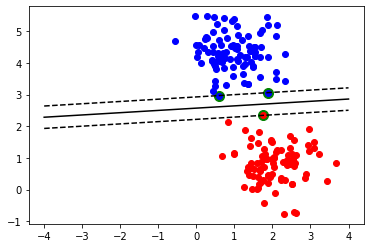

     pcost       dcost       gap    pres   dres
 0: -4.5000e+01 -9.7911e+01  8e+02  3e+01  2e+00
 1: -5.5599e+01 -5.7227e+01  4e+02  1e+01  1e+00
 2: -2.4883e+01 -8.1625e+00  1e+02  4e+00  3e-01
 3: -1.4678e+00 -5.6722e-01  7e+00  2e-01  1e-02
 4: -3.5325e-01 -4.4475e-01  2e+00  4e-02  3e-03
 5: -2.1864e-01 -3.7097e-01  9e-01  2e-02  1e-03
 6: -2.1083e-01 -2.8823e-01  3e-01  4e-03  3e-04
 7: -2.1833e-01 -2.8115e-01  2e-01  2e-03  1e-04
 8: -2.4541e-01 -2.6856e-01  6e-02  6e-04  4e-05
 9: -2.4912e-01 -2.6416e-01  4e-02  4e-04  3e-05
10: -2.4702e-01 -2.6156e-01  1e-02  4e-16  1e-14
11: -2.5845e-01 -2.6043e-01  2e-03  2e-16  1e-14
12: -2.6021e-01 -2.6023e-01  3e-05  5e-16  1e-14
13: -2.6023e-01 -2.6023e-01  3e-07  5e-16  1e-14
14: -2.6023e-01 -2.6023e-01  3e-09  7e-17  1e-14
Optimal solution found.
7 vetores de suporte de 180 pontos
18 de 20 predições corretas


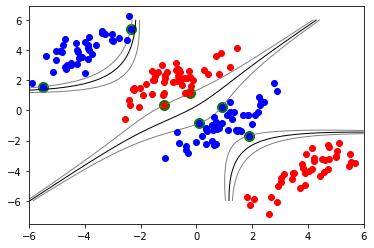

     pcost       dcost       gap    pres   dres
 0: -4.9446e+01 -1.0934e+02  1e+03  4e+01  2e+00
 1: -7.5325e+01 -9.1453e+01  7e+02  2e+01  1e+00
 2: -3.7019e+01 -1.5222e+01  2e+02  7e+00  4e-01
 3: -3.0372e+00 -6.0295e-01  1e+01  4e-01  2e-02
 4: -3.4100e-01 -4.8763e-01  1e+00  3e-02  2e-03
 5: -2.5886e-01 -3.9360e-01  6e-01  1e-02  6e-04
 6: -2.7758e-01 -3.3495e-01  2e-01  4e-03  2e-04
 7: -2.9779e-01 -2.9752e-01  7e-02  1e-03  7e-05
 8: -2.8506e-01 -2.8280e-01  7e-02  9e-04  5e-05
 9: -2.6762e-01 -2.7585e-01  6e-02  6e-04  3e-05
10: -2.5422e-01 -2.7485e-01  4e-02  3e-04  2e-05
11: -2.6546e-01 -2.7070e-01  1e-02  7e-05  4e-06
12: -2.6915e-01 -2.6945e-01  3e-04  5e-07  3e-08
13: -2.6943e-01 -2.6943e-01  4e-06  5e-09  3e-10
14: -2.6943e-01 -2.6943e-01  4e-08  5e-11  3e-12
Optimal solution found.
9 vetores de suporte de 180 pontos
20 de 20 predições corretas


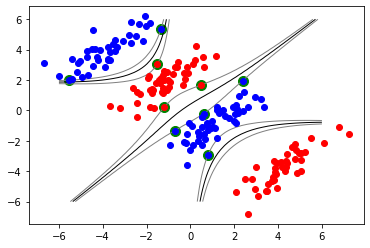

     pcost       dcost       gap    pres   dres
 0:  1.3326e+05 -1.1530e+08  3e+08  7e-01  4e-12
 1:  4.1909e+05 -2.8056e+07  4e+07  6e-02  5e-11
 2:  3.1500e+05 -4.1864e+06  5e+06  6e-03  6e-12
 3:  2.6668e+04 -7.0645e+05  8e+05  5e-04  3e-12
 4: -7.2842e+03 -4.5026e+04  4e+04  1e-05  3e-12
 5: -8.3579e+03 -2.4167e+04  2e+04  5e-06  2e-12
 6: -1.0073e+04 -2.3988e+04  1e+04  3e-06  4e-12
 7: -1.0751e+04 -2.2599e+04  1e+04  2e-06  4e-12
 8: -1.1104e+04 -1.7814e+04  7e+03  6e-07  5e-12
 9: -1.1949e+04 -1.7082e+04  5e+03  4e-07  4e-12
10: -1.1975e+04 -1.6624e+04  5e+03  2e-07  5e-12
11: -1.2884e+04 -1.5339e+04  2e+03  9e-08  5e-12
12: -1.3051e+04 -1.4836e+04  2e+03  2e-08  4e-12
13: -1.3409e+04 -1.4206e+04  8e+02  1e-08  4e-12
14: -1.3506e+04 -1.4146e+04  6e+02  6e-09  4e-12
15: -1.3590e+04 -1.3878e+04  3e+02  2e-09  5e-12
16: -1.3704e+04 -1.3726e+04  2e+01  1e-10  5e-12
17: -1.3713e+04 -1.3714e+04  2e-01  5e-12  5e-12
18: -1.3714e+04 -1.3714e+04  2e-03  3e-12  6e-12
Optimal solution foun

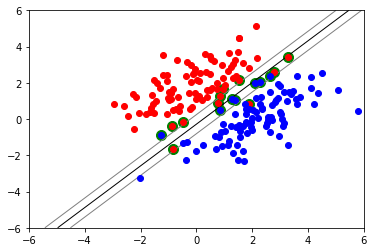

In [2]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

#rbf
def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))


# Adaptado de https://github.com/scikit-learn/scikit-learn/blob/fd237278e895b42abe8d8d09105cbb82dc2cbba7/sklearn/svm/_classes.py
# implementação própria do SVM para fins de estudo do algoritmo
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
class SVM(object):

    #construtor 
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    #treinamento
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # https://mathworld.wolfram.com/GramMatrix.html
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # resolve problema programação quadrática
        #https://cvxopt.org/examples/tutorial/qp.html
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multiplicadores
        a = np.ravel(solution['x'])

        # Os vetores de suporte têm multiplicadores de intervalo diferentes de zero
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d vetores de suporte de %d pontos" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Vetor de peso
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # gerar dados de treinamento  2-d
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # gerar dados de treinamento  2-d
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # dado x, retorne y tal que [x,y] na linha
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        
        X, y = make_blobs(n_samples=250, centers=2, random_state=0, cluster_std=0.60)
        y[y == 0] = -1
        tmp = np.ones(len(X))
        y = tmp * y
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d de %d predições corretas" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linea_gaussian_kernel():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d de %d predições corretas" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)
        
    def test_non_linear_polynomial_kernel():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d de %d predições corretas" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)        

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d de %d predições corretas" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
    test_linear()
    test_non_linear_polynomial_kernel()
    test_non_linea_gaussian_kernel()
    test_soft()


As SVMs também são robustas diante de dados de grande dimensão, sobre os quais outras técnicas de aprendizado comumente obtêm classificadores super ou sub ajustados. Outra característica atrativa é a convexidade do problema de otimização formulado em seu treinamento, que implica na existência de um único mínimo global. Essa é uma vantagem das SVMs sobre, por exemplo, as Redes Neurais Artificiais (RNAs) Perceptron Multicamadas (Multilayer Perceptron), em que há mínimos locais na função objetivo minimizada. Além disso, o uso de funções Kernel na não-linearização das SVMs torna o algoritmo eficiente, pois permite a construção de simples hiperplanos em um espaço de alta dimensão de forma tratável do ponto de vista computacional.

Entre as principais limitações das SVMs encontram-se a sua sensibilidade a escolhas de valores de parâmetros.